In [1]:
import sys; sys.path.append("..")
from epi_model import *

In [2]:
import pickle
with open('2 full_run.pickle', 'rb') as inp:
    ms = pickle.load(inp)

In [3]:
tnets = sorted(set(x[0] for x in ms.keys()))
s2es = sorted(set(x[1] for x in ms.keys()))
n_vaccs = sorted(set(x[2] for x in ms.keys()))
names = sorted(set(x[3] for x in ms.keys()))

In [4]:
(tnets,s2es,n_vaccs,names)

([0, 1],
 [0.05, 0.1, 0.15, 0.2],
 [15, 31, 39, 46, 62, 78, 117, 156],
 ['friendHighDeg_2',
  'friend_1',
  'local_betweenness_4',
  'nominate_local_betweenness_5',
  'none_6',
  'rand_0',
  'targeted_3'])

In [5]:
k, v = list(ms.items())[0]

In [6]:
df = pd.DataFrame.from_records([
    list(k)+[np.mean([run[-1] for run in m])]
    for k,m in ms.items()
    if len(m)
], columns= ['tnet','s2e','n_vacc','name','m'])

In [7]:
set(df[df.tnet==1].n_vacc)

{39, 78, 117, 156}

In [8]:
df.head()

,tnet,s2e,n_vacc,name,m
0,0,0.05,15,rand_0,40.38
1,0,0.05,15,friend_1,40.69
2,0,0.05,15,friendHighDeg_2,38.32
3,0,0.05,15,targeted_3,37.69
4,0,0.05,15,local_betweenness_4,37.50


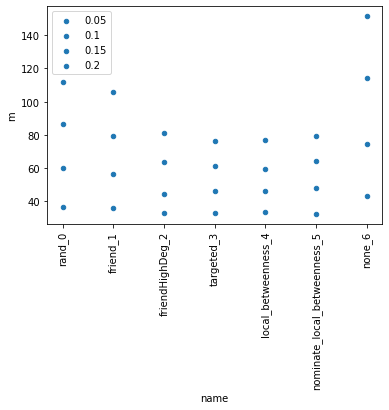

In [11]:
ax = plt.axes()
for s2e in s2es:
    df[(
        (df.tnet==0)&
        (df.s2e==s2e)&
        (df.n_vacc==46)
    )].plot.scatter("name","m", label=s2e, ax=ax)

    plt.xticks(rotation = 90)
plt.show()

In [10]:
x1 = np.mean([x[-1] for x in ms[(0,0.05,15,'none_6')]]) - 20
x2 = np.mean([x[-1] for x in ms[(0,0.2,15,'none_6')]]) - 20

In [11]:
tnets = [
    temporalNetwork.load('high school').range(1,2),
    temporalNetwork.load('high school2')
]

In [12]:
x1 = (np.mean([x[-1] for x in ms[(0,0.05,15,'none_6')]]) - 20, tnets[0].Nnodes - 20)
x2 = (np.mean([x[-1] for x in ms[(0,0.2,15,'none_6')]]) - 20, tnets[0].Nnodes - 20)
x3 = (np.mean([x[-1] for x in ms[(1,0.05,39,'none_6')]]) - 20, tnets[1].Nnodes - 20)
x4 = (np.mean([x[-1] for x in ms[(1,0.2,39,'none_6')]]) - 20, tnets[1].Nnodes - 20)

In [13]:
display(Markdown(f"""
Without any vaccinations and 20 initial infections, 
    the *Mastrandrea2015* high school will gain on average an additional
        {x1[0]:0.1f} / {x1[1]} infections ({x1[0]/x1[1]:0.0%})
        after 100 days
        considering a daily infection rate of 0.05 (the minimum considered in this paper),
    and an additional
        {x2[0]:0.1f} / {x2[1]} infections ({x2[0]/x2[1]:0.0%})
        after 100 days
        considering a daily infection rate of 0.2 (the maximum considered in this paper).
Without any vaccinations and 20 initial infections, 
    the *Salathé2010* high school will gain on average an additional
        {x3[0]:0.1f} / {x3[1]} infections ({x3[0]/x3[1]:0.0%})
        after 100 days
        considering a daily infection rate of 0.05,
    and an additional
        {x4[0]:0.1f} / {x4[1]} infections ({x4[0]/x4[1]:0.0%})
        after 100 days
        considering a daily infection rate of 0.2.
"""))


Without any vaccinations and 20 initial infections, 
    the *Mastrandrea2015* high school will gain on average an additional
        22.0 / 290 infections (8%)
        after 100 days
        considering a daily infection rate of 0.05 (the minimum considered in this paper),
    and an additional
        132.2 / 290 infections (46%)
        after 100 days
        considering a daily infection rate of 0.2 (the maximum considered in this paper).
Without any vaccinations and 20 initial infections, 
    the *Salathé2010* high school will gain on average an additional
        78.8 / 764 infections (10%)
        after 100 days
        considering a daily infection rate of 0.05,
    and an additional
        565.4 / 764 infections (74%)
        after 100 days
        considering a daily infection rate of 0.2.


In [14]:
vacc_ps = [0.05, 0.10, 0.15, 0.20]

actual_ns = sorted(set(df[df.tnet==0].n_vacc))

for a, p in zip(actual_ns, vacc_ps):
    df.loc[(df.tnet==0)&(df.n_vacc==a), 'n_vacc'] = p

In [15]:
actual_ns = sorted(set(df[df.tnet==1].n_vacc))

for a, p in zip(actual_ns, vacc_ps):
    df.loc[(df.tnet==1)&(df.n_vacc==a), 'n_vacc'] = p

# simple vaccination steps

In [18]:
s_add = []

ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 0
    if len(v)
]))

for p, N_vacc in zip(vacc_ps, ns):
    res = (np.mean([x[-1] for x in ms[(0,0.2,N_vacc,'rand_0')]]) - 20 ) / (tnets[0].Nnodes - 20 - N_vacc)
    s_add.append( f"{res:0.1%} ({p:0.0%} vaccinated)" )
    
s_add = ", ".join(s_add[:-1]) + f" and {s_add[-1]}"



s_add_2 = []

ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 1
    if len(v)
]))

for p, N_vacc in zip(vacc_ps, ns):
    res = (np.mean([x[-1] for x in ms[(1,0.2,N_vacc,'rand_0')]]) - 20 ) / (tnets[1].Nnodes - 20 - N_vacc)
    s_add_2.append( f"{res:0.1%} ({p:0.0%} vaccinated)" )
    
s_add_2 = ", ".join(s_add_2[:-1]) + f" and {s_add_2[-1]}"


display(Markdown(f"""
Randomly distributed vaccinations have some effect on the spread of this disease.
In the case of highest infectiousness (0.2 daily probability),
    vaccinating students in the *Mastrandrea2015* high school 
        reduces average infections after 100 days among the unvaccinated from 
    {(np.mean([x[-1] for x in ms[(0,0.2,15,'none_6')]]) - 20) / (tnets[0].Nnodes - 20):0.1%} (no vaccination)
    to {s_add}.
Likewise, vaccinating students in the *Salathé2010* high school 
    reduces average infections after 100 days among the unvaccinated from 
    {(np.mean([x[-1] for x in ms[(1,0.2,39,'none_6')]]) - 20) / (tnets[1].Nnodes - 20):0.1%} (no vaccination)
    to {s_add_2}.
"""))


Randomly distributed vaccinations have some effect on the spread of this disease.
In the case of highest infectiousness (0.2 daily probability),
    vaccinating students in the *Mastrandrea2015* high school 
        reduces average infections after 100 days among the unvaccinated from 
    45.6% (no vaccination)
    to 42.6% (5% vaccinated), 39.7% (10% vaccinated), 37.6% (15% vaccinated) and 35.0% (20% vaccinated).
Likewise, vaccinating students in the *Salathé2010* high school 
    reduces average infections after 100 days among the unvaccinated from 
    74.0% (no vaccination)
    to 71.7% (5% vaccinated), 71.6% (10% vaccinated), 69.0% (15% vaccinated) and 67.7% (20% vaccinated).


# which were most effective?

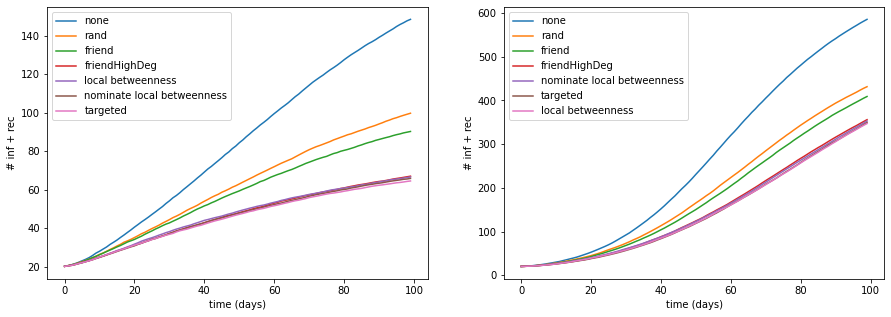

In [19]:
plt.figure(figsize=(15,5))
ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 0
    if len(v)
]))

names = sorted(names, key=lambda x:-np.array(ms[(0,0.2,ns[-1],x)]).mean(axis=0)[-1])

plt.subplot(1,2,1)
for name in names:
    Y = np.array(ms[(0,0.2,ns[-1],name)]).mean(axis=0)
    plt.plot(Y, label=" ".join(name.split("_")[:-1]))
plt.legend()
plt.xlabel("time (days)")
plt.ylabel("# inf + rec")

ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 1
    if len(v)
]))

names = sorted(names, key=lambda x:-np.array(ms[(1,0.2,ns[-1],x)]).mean(axis=0)[-1])

plt.subplot(1,2,2)
for name in names:
    Y = np.array(ms[(1,0.2,ns[-1],name)]).mean(axis=0)
    plt.plot(Y, label=" ".join(name.split("_")[:-1]))
plt.legend()
plt.xlabel("time (days)")
plt.ylabel("# inf + rec")

plt.savefig("2a inf_over_time.png")

In [20]:
names

['none_6',
 'rand_0',
 'friend_1',
 'friendHighDeg_2',
 'nominate_local_betweenness_5',
 'targeted_3',
 'local_betweenness_4']

In [21]:
s_add = []

ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 0
    if len(v)
]))

for p, N_vacc in zip(vacc_ps, ns):
    res_nlb = (np.mean([x[-1] for x in ms[(0,0.2,N_vacc,'nominate_local_betweenness_5')]]) - 20 ) / (tnets[0].Nnodes - 20 - N_vacc)
    res_rand = (np.mean([x[-1] for x in ms[(0,0.2,N_vacc,'rand_0')]]) - 20 ) / (tnets[0].Nnodes - 20 - N_vacc)
    s_add.append( f"{1-res_nlb/res_rand:0.1%} ({p:0.0%} vaccinated)" )
    
s_add = ", ".join(s_add[:-1]) + f" and {s_add[-1]}"

In [33]:
def get_stats(XX):

    s_add = []

    ns = sorted(set([
        x[2] for x,v in ms.items()
        if x[0] == 0
        if len(v)
    ]))

    for p, N_vacc in zip(vacc_ps, ns):
        den = (tnets[0].Nnodes - 20 - N_vacc)
        if 'none_' in XX:
            den = (tnets[0].Nnodes - 20)
        res_nlb = (np.mean([x[-1] for x in ms[(0,0.2,N_vacc,XX)]]) - 20 ) / den
        s_add.append( f"{res_nlb:0.1%} ({p:0.0%} vaccinated)" )

    s_add = ", ".join(s_add[:-1]) + f" and {s_add[-1]}"

    return s_add

In [34]:
[(XX,get_stats(XX)) for XX in names]

[('none_6',
  '45.6% (5% vaccinated), 44.2% (10% vaccinated), 45.4% (15% vaccinated) and 44.3% (20% vaccinated)'),
 ('rand_0',
  '42.6% (5% vaccinated), 39.7% (10% vaccinated), 37.6% (15% vaccinated) and 35.0% (20% vaccinated)'),
 ('friend_1',
  '40.9% (5% vaccinated), 38.1% (10% vaccinated), 35.2% (15% vaccinated) and 30.8% (20% vaccinated)'),
 ('friendHighDeg_2',
  '36.7% (5% vaccinated), 30.3% (10% vaccinated), 25.1% (15% vaccinated) and 20.6% (20% vaccinated)'),
 ('nominate_local_betweenness_5',
  '36.3% (5% vaccinated), 29.3% (10% vaccinated), 24.3% (15% vaccinated) and 20.1% (20% vaccinated)'),
 ('targeted_3',
  '33.9% (5% vaccinated), 28.4% (10% vaccinated), 23.2% (15% vaccinated) and 19.5% (20% vaccinated)'),
 ('local_betweenness_4',
  '34.3% (5% vaccinated), 28.5% (10% vaccinated), 23.3% (15% vaccinated) and 20.4% (20% vaccinated)')]

In [22]:
names

['none_6',
 'rand_0',
 'friend_1',
 'friendHighDeg_2',
 'nominate_local_betweenness_5',
 'targeted_3',
 'local_betweenness_4']

In [23]:
ns = sorted(set([
    x[2] for x,v in ms.items()
    if x[0] == 0
    if len(v)
]))

In [24]:
x1 = (
    np.mean([x[-1] for x in ms[(0,0.2,15,'none_6')]]) - 20,
    tnets[0].Nnodes - 20
)

x2 = (
    np.mean([x[-1] for x in ms[(0,0.2,ns[-1],'rand_0')]]) - 20,
    tnets[0].Nnodes - 20 - ns[-1]
)

x3 = (
    np.mean([x[-1] for x in ms[(0,0.2,ns[-1],'friendHighDeg_2')]]) - 20,
    tnets[0].Nnodes - 20 - ns[-1]
)

In [25]:
display(Markdown(f"""
Targeted vaccinations provide a significant additional protective effect in these school settings.
The most effective strategies are essentially a tie between *local betweenness nomination*, *degree nomination*, *local betweenness* and *degree*.
*Local betweenness nomination* of vaccinations to 20% of the student population in the *Mastrandrea2015* high school
    reduces infections by a further {s_add}
    compared to *random* distribution, 
    considering a daily infection rate of 0.2.
Stated more directly, randomly vaccinating 20% of the student population in this high school 
    reduces infection among the unvaccinated from
    an average of {x1[0]:0.1f} new infections of the {x1[1]:d} susceptible students ({x1[0]/x1[1]:0.0%})
        when no students are vaccinated,
    to {x2[0]:0.1f} new infections of the {x2[1]:d} susceptible students ({x2[0]/x2[1]:0.0%}).
Vaccinating 20% of students via *degree nomination*
    reduces this average further to just {x3[0]:0.1f} new infections of the {x3[1]:d} susceptible students ({x3[0]/x3[1]:0.0%}).
"""))


Targeted vaccinations provide a significant additional protective effect in these school settings.
The most effective strategies are essentially a tie between *local betweenness nomination*, *degree nomination*, *local betweenness* and *degree*.
*Local betweenness nomination* of vaccinations to 20% of the student population in the *Mastrandrea2015* high school
    reduces infections by a further 14.9% (5% vaccinated), 26.3% (10% vaccinated), 35.3% (15% vaccinated) and 42.5% (20% vaccinated)
    compared to *random* distribution, 
    considering a daily infection rate of 0.2.
Stated more directly, randomly vaccinating 20% of the student population in this high school 
    reduces infection among the unvaccinated from
    an average of 132.2 new infections of the 290 susceptible students (46%)
        when no students are vaccinated,
    to 79.7 new infections of the 228 susceptible students (35%).
Vaccinating 20% of students via *degree nomination*
    reduces this average further to just 47.0 new infections of the 228 susceptible students (21%).
